In [83]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Load the dataset
df_penguins = pd.read_csv("penguins.csv")

# Step 2: Preprocess the data (handle missing values)
df_penguins.dropna(inplace=True)

# Step 3: Feature selection (choose relevant columns from pairplots)
selected_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df_penguins[selected_features]


# Step 5: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Step 4: Encoding categorical variables 
y = df_penguins["species"]
penguins_main = df_penguins.iloc[:,1:]
X = pd.get_dummies(penguins_main)
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True


Text(0.5, 1.0, 'Elbow method showing optimal k')

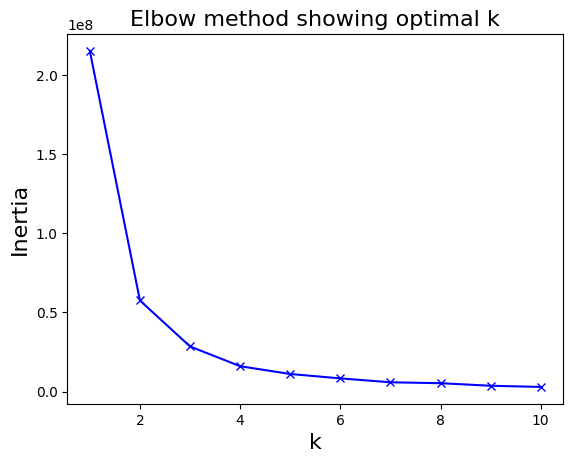

In [79]:

# Step 6: Choose the number of clusters (K) using the elbow method
# Set up a variable to store the inertias
inertia_list = []
K = 10
# Loop over values of k from 1 to 10
for k in range(1, K+1):
    # Instantiate the KMeans class with k clusters
    kmm = KMeans(n_clusters=k)
    # Fit the model to the data
    kmm.fit(X) 
    # Store the value of the inertia for this value of k
    inertia_list.append(kmm.inertia_)

#Plot the elbow 
font_size = 16
plt.figure()
plt.plot(range(1, K+1), inertia_list, 'bx-')
plt.xlabel('k',fontsize = font_size)
plt.ylabel('Inertia',fontsize = font_size)
plt.title('Elbow method showing optimal k',fontsize = font_size)

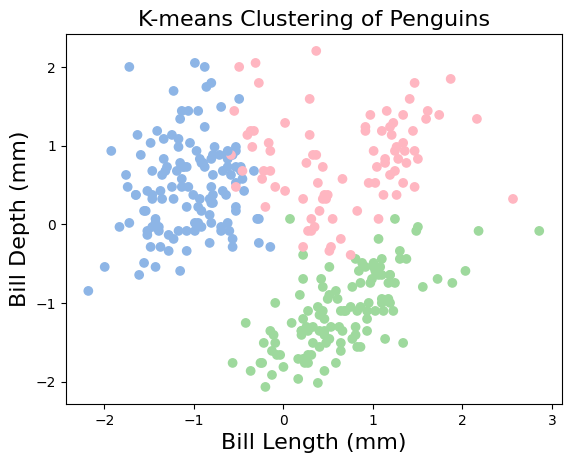

In [84]:
# Step 7: Apply K-means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Step 8: Visualize the clusters
colors = ['#8db5e6', '#9ed99d', '#ffb6c1']
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=[colors[label] for label in cluster_labels])
plt.xlabel('Bill Length (mm)', fontsize = font_size)
plt.ylabel('Bill Depth (mm)',fontsize = font_size)
plt.title('K-means Clustering of Penguins',fontsize = font_size)
plt.show()

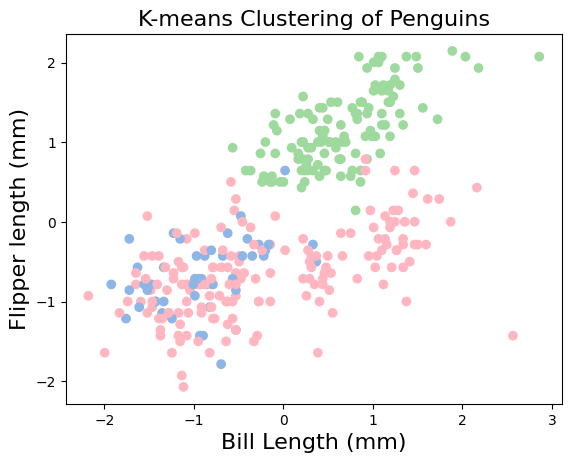

In [81]:
# Step 8: Visualize the clusters
colors = ['#8db5e6', '#9ed99d', '#ffb6c1']
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=[colors[label] for label in cluster_labels])
plt.xlabel('Bill Length (mm)', fontsize = font_size)
plt.ylabel('Flipper length (mm)',fontsize = font_size)
plt.title('K-means Clustering of Penguins',fontsize = font_size)
plt.show()

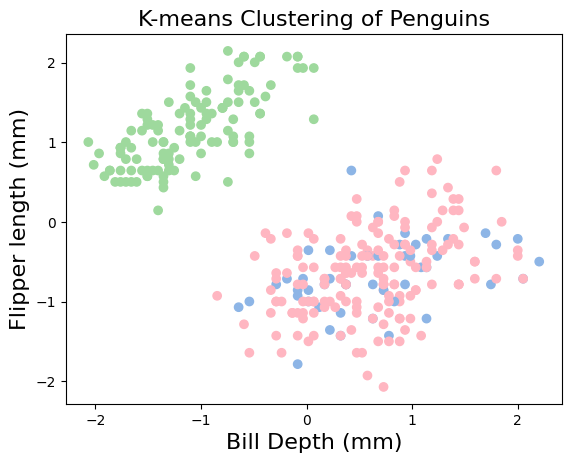

In [82]:
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=[colors[label] for label in cluster_labels])
plt.xlabel('Bill Depth (mm)', fontsize = font_size)
plt.ylabel('Flipper length (mm)',fontsize = font_size)
plt.title('K-means Clustering of Penguins',fontsize = font_size)
plt.show()

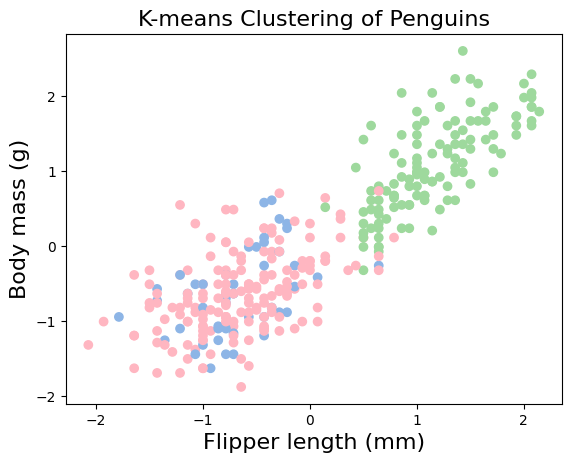

In [75]:
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=[colors[label] for label in cluster_labels])
plt.xlabel('Flipper length (mm)', fontsize = font_size)
plt.ylabel('Body mass (g)',fontsize = font_size)
plt.title('K-means Clustering of Penguins',fontsize = font_size)
plt.show()

In [40]:
#Using predict method 
labels = kmeans.predict(X_scaled)
# Check how the kmeans model classIfied the species

matrix = pd.DataFrame({'labels': labels, 'species': y})
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)


species  Adelie  Chinstrap  Gentoo
labels                            
0           124          5       0
1             0          0     119
2            22         63       0
